In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [6]:
# dictionary of title_Id -> title_name
fp=open("title_Id.txt",'r')

titleId_titleName={}
for line in fp:
    line=line.strip().split('#')
    #print line[0], line[1]
    if len(line)!=2:
        if len(line)>2:
            key=line[-1]
            value=""
            for i in range(len(line)-1):
                value=value+line[i]
            titleId_titleName[key]=value 
    else:
        titleId_titleName[line[1]]=line[0]

fp.close()

    

In [7]:
# dictionary of journal_Id -> journal_name
fp=open("journal_Id.txt",'r')

journalId_JournalName={}
for line in fp:
    line=line.strip().split("#")
    journalId_JournalName[line[1]]=line[0]

fp.close()

In [8]:
# dictionary of author_Id -> author_name
fp= open("author_Id.txt",'r')

authorId_authorName={}
for line in fp:
    line = line.strip().split("#")
    authorId_authorName[line[1]]=line[0]
fp.close()

In [9]:
fp= open("title_Journal_Author.txt",'r')

authorList=[]
titleJournalList=[]
for line in fp:
    line = line.strip().split("#")
    curr= titleId_titleName[line[0]] + " " + journalId_JournalName[line[1]]
    titleJournalList.append(curr)
    tempList=line[2].strip().split('|') #author ids list
    tempNameList=[] #authors namelist
    for i in tempList:
        tempNameList.append(authorId_authorName[i])
    authorList.append(tempNameList)
    
fp.close()

In [10]:
# to find a no. of unique words
vocab={}
for line in titleJournalList:
    wordList=line.strip().split()
    for word in wordList:
        if word in vocab:
            vocab[word]=vocab[word]+1
        else:
            vocab[word]=1

print len(vocab)

125296


In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
vec=vectorizer.fit(titleJournalList)
vectorized=vec.transform(titleJournalList)


In [12]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
km.fit(vectorized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(20):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  computers  circuits  systems  industry  interacting  journal  biomed  design  based  trans
Cluster 1:  neural  transactions  ieee  networks  information  learning  forensics  security  biomedicine  netw
Cluster 2:  computing  based  wireless  information  systems  networks  mobile  jasist  using  synthese
Cluster 3:  comput  parallel  distrib  sci  technol  distributed  networks  based  algorithms  algorithm
Cluster 4:  software  engineering  ieee  international  knowledge  journal  development  iee  proceedings  iet
Cluster 5:  siam  scientific  computing  equations  method  methods  problems  finite  multigrid  numerical
Cluster 6:  physics  comput  communications  computer  method  equations  numerical  finite  flows  simulations
Cluster 7:  magazine  lib  digital  library  libraries  preservation  metadata  repository  collections  research
Cluster 8:  data  trans  ieee  statistics  analysis  computational  vlsi  knowl  amp  eng
Cluster 9:  graph 

In [14]:
authorClusters={} # Cluster Id to List of authorName
for i in range(len(titleJournalList)):
    currList=[]
    currList.append(titleJournalList[i])
    data_features=vec.transform(currList)
    labels=km.predict(data_features)
    
    clusterId=labels[0]
    curAuthorsList=authorList[i] #authors list for current article
    if clusterId in authorClusters.keys():
        #fetch the existing list of authors for the clusterId
        tempList=authorClusters[clusterId]
        for j in curAuthorsList:
            tempList.append(j)
            
        #update authorsClusters with updated authors list
        authorClusters[clusterId]=tempList
        
    else: #create a new key with the new cluster id and make value list of authors for the current article
        authorClusters[clusterId]=curAuthorsList

# print clusters Id-> author ids



In [15]:
fp=open("Kmeans_TfIdf_output","wr")

for i in authorClusters.keys():
    outstr=str(i) + " => " + str(authorClusters[i])
    fp.write(outstr+"\n")
    fp.write("**************************************************************************************************************************"+"\n")
fp.close()


In [16]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [17]:
range_n_clusters = [10,20,50,70,100,130,150,170,200]

In [22]:
valueList_5000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=5000)
    valueList_5000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.010734032515
For n_clusters = 20 The average silhouette_score is : 0.0189018479368
For n_clusters = 50 The average silhouette_score is : 0.0370186729109
For n_clusters = 70 The average silhouette_score is : 0.0341606141535
For n_clusters = 100 The average silhouette_score is : 0.0362486230873
For n_clusters = 130 The average silhouette_score is : 0.0330725535286
For n_clusters = 150 The average silhouette_score is : 0.0312054547606
For n_clusters = 170 The average silhouette_score is : 0.0310797267519
For n_clusters = 200 The average silhouette_score is : 0.0283946336987


In [23]:
valueList_10000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=10000)
    valueList_10000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.0105448793087
For n_clusters = 20 The average silhouette_score is : 0.0183119283923
For n_clusters = 50 The average silhouette_score is : 0.0370563180451
For n_clusters = 70 The average silhouette_score is : 0.0343865015456
For n_clusters = 100 The average silhouette_score is : 0.0363259087534
For n_clusters = 130 The average silhouette_score is : 0.0321412732477
For n_clusters = 150 The average silhouette_score is : 0.0317292099644
For n_clusters = 170 The average silhouette_score is : 0.0319264441636
For n_clusters = 200 The average silhouette_score is : 0.0301362632732


In [19]:
valueList_15000=[]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1,random_state=10)
    cluster_labels = km.fit_predict(vectorized)
    silhouette_avg = silhouette_score(vectorized, cluster_labels, metric='euclidean',sample_size=15000)
    valueList_15000.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.0108246198577
For n_clusters = 20 The average silhouette_score is : 0.018177873247
For n_clusters = 50 The average silhouette_score is : 0.0367729002117
For n_clusters = 70 The average silhouette_score is : 0.0342381974225
For n_clusters = 100 The average silhouette_score is : 0.0366813813101
For n_clusters = 130 The average silhouette_score is : 0.0327856670438
For n_clusters = 150 The average silhouette_score is : 0.0324619651998
For n_clusters = 170 The average silhouette_score is : 0.0313815821048
For n_clusters = 200 The average silhouette_score is : 0.0284556317012


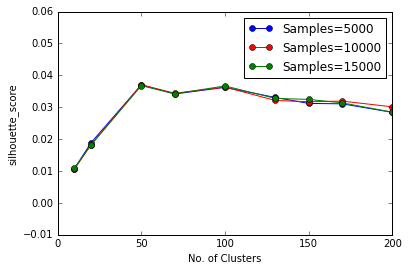

In [46]:
import matplotlib.pyplot as plt

plt.axis([0,200,-0.01,0.06])
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')

plt.plot(range_n_clusters,valueList_5000,color='b',marker='o',label='Samples=5000')
plt.plot(range_n_clusters,valueList_10000,color='r',marker='o',label='Samples=10000')
plt.plot(range_n_clusters,valueList_15000,color='g',marker='o',label='Samples=15000')

plt.legend()
plt.show()